In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
user = pd.read_csv("user_table.csv")
home = pd.read_csv("home_page_table.csv")
payment = pd.read_csv("payment_page_table.csv")
search = pd.read_csv("search_page_table.csv")
pay_conf = pd.read_csv("payment_confirmation_table.csv")

In [2]:
#conversion rate from user to home page
print(user.shape)
print(home.shape)
print(user['user_id'].nunique())
print(home['user_id'].nunique())
user_home = user.merge(home, on = 'user_id', how = 'right')
con_ratuh = (home['user_id'].nunique()/user['user_id'].nunique())*100
con_ratuh
#As the values are same so the data in the user table those user id are there in home page as well so conversion rate is 100%

(90400, 4)
(90400, 2)
90400
90400


100.0

In [3]:
#conversion rate from home to search
con_ratehs = (search['user_id'].nunique()/home['user_id'].nunique())*100
con_ratehs

50.0

conversion rate is 50% for the people who went to search form home

Search to Payment

In [4]:
#trying to find the shape and the unique no of values in both the user_id columns of table
print(search.shape)
print(payment.shape)
print(search['user_id'].nunique())
print(payment['user_id'].nunique())
#merging the tables to check the  how many user id are same in both the tables
paym_search = payment.merge(search, left_on = 'user_id', right_on = 'user_id')
# even after meerging the rows are same as that in  payment page so means the data 
#is consistent the users in search are there in payment
paym_search.shape

(45200, 2)
(6030, 2)
45200
6030


(6030, 3)

In [5]:
##conversion rate from Search to payment_page_table
cosepay = (payment['user_id'].nunique()/search['user_id'].nunique())*100
cousepay = round(cosepay,2)
print(cousepay)


13.34


payment to payment_confirmation


In [6]:
#trying to find the shape and the unique no of values in both the user_id columns of table
print(payment.shape)
print(pay_conf.shape)
print(payment['user_id'].nunique())
print(pay_conf['user_id'].nunique())
#merging the tables to check the  how many user id are same in both the tables
payment_conf = payment.merge(pay_conf, left_on = 'user_id', right_on = 'user_id')
# even after meerging the rows are same as that in  payment page so means the data 
#is consistent the users in payment_conf are there in payment
print(payment_conf.shape)

(6030, 2)
(452, 2)
6030
452
(452, 3)


In [7]:
##conversion rate from payment_page_table to payment_confirmtion_table
copayc = (pay_conf['user_id'].nunique()/payment['user_id'].nunique())*100
copayc = round(copayc,2)
print(copayc)


7.5


In [8]:
#graph plot to compare the no of people visiting the pages
pages = ['home','search','payment','payment_conf']
ht = home['user_id'].nunique()
st = search['user_id'].nunique()
pt = payment['user_id'].nunique()
payc = pay_conf['user_id'].nunique()
no_users = [ht,st,pt,payc]
convrate = [con_ratuh,con_ratehs,cosepay,copayc]



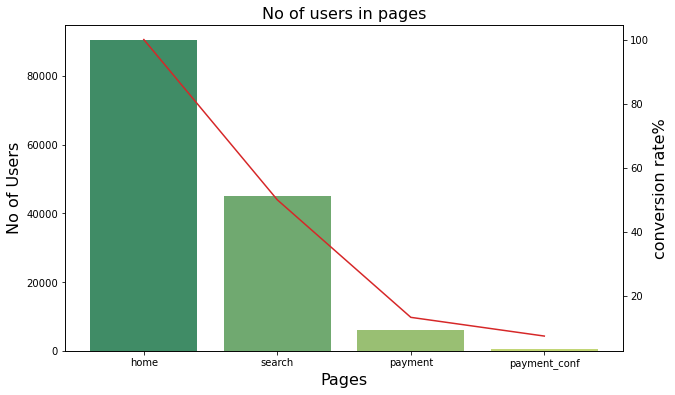

In [9]:
#create combo plot
fig,ax1 = plt.subplots(figsize = (10,6))
#bar plot creation
ax1.set_title('No of users in pages', fontsize=16)
ax1.set_xlabel('Pages', fontsize=16)
ax1.set_ylabel('No of Users', fontsize=16)
ax1 = sns.barplot(pages, no_users, palette='summer')
#for the same x axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('conversion rate%', fontsize=16)
ax2 = sns.lineplot(x= pages,y = convrate,sort = False, color=color)
plt.savefig("Comparison of users and the conversion rate")
plt.show()


In [10]:
user_mobile = user[user['device'] == 'Mobile']
user_desktop = user[user['device'] == 'Desktop']

In [11]:
# Extracting the mobile data users from all the database
home_mobile = home.merge(user_mobile,left_on = 'user_id',right_on = 'user_id')
search_mobile = search.merge(home_mobile,left_on = 'user_id',right_on = 'user_id')
payment_mobile = payment.merge(search_mobile,left_on = 'user_id',right_on = 'user_id')
payconf_mobile = pay_conf.merge(payment_mobile,left_on = 'user_id',right_on = 'user_id')

In [12]:
#Extracting the desktop data users from all the database
home_desktop = home.merge(user_desktop,left_on = 'user_id',right_on = 'user_id')
search_desktop = search.merge(home_desktop,left_on = 'user_id',right_on = 'user_id')
payment_desktop = payment.merge(search_desktop,left_on = 'user_id',right_on = 'user_id')
payconf_desktop = pay_conf.merge(payment_desktop,left_on = 'user_id',right_on = 'user_id')

In [13]:
#No of mobile users in each  page
homemobileusers = home_mobile['user_id'].nunique()
searchmobileusers = search_mobile['user_id'].nunique()
paymentmobileusers = payment_mobile['user_id'].nunique()
payconfmobileusers = payconf_mobile['user_id'].nunique()

In [14]:
#No of male female mobile users in each page
homefemale = home_mobile[home_mobile['sex'] == 'Female']['sex'].count()
searchfemale = search_mobile[search_mobile['sex'] == 'Female']['sex'].count()
paymentfemale = payment_mobile[payment_mobile['sex'] == 'Female']['sex'].count()
payconfemale = payconf_mobile[payconf_mobile['sex'] == 'Female']['sex'].count()

homemale = homemobileusers - homefemale
searchmale = searchmobileusers - searchfemale
paymentmale = paymentmobileusers - paymentfemale
payconmale = payconfmobileusers - payconfemale




In [15]:
#No of desktop users in each  page
homedesktopusers = home_desktop['user_id'].nunique()
searchdesktopusers = search_desktop['user_id'].nunique()
paymentdesktopusers = payment_desktop['user_id'].nunique()
payconfdesktopusers = payconf_desktop['user_id'].nunique()

In [27]:
#No of male female desktop users in each page
homefemaled = home_desktop[home_desktop['sex'] == 'Female']['sex'].count()
searchfemaled = search_desktop[search_desktop['sex'] == 'Female']['sex'].count()
paymentfemaled = payment_desktop[payment_desktop['sex'] == 'Female']['sex'].count()
payconfemaled = payconf_desktop[payconf_desktop['sex'] == 'Female']['sex'].count()

homemaled = homedesktopusers - homefemaled
searchmaled = searchdesktopusers - searchfemaled
paymentmaled = paymentdesktopusers - paymentfemaled
payconmaled = payconfdesktopusers - payconfemaled

In [16]:
#conversion rate for mobile users
conuhm = (home_mobile['user_id'].nunique()/user_mobile['user_id'].nunique())*100
conhsm = (search_mobile['user_id'].nunique()/home_mobile['user_id'].nunique())*100
conspm = (payment_mobile['user_id'].nunique()/search_mobile['user_id'].nunique())*100
conppm = (payconf_mobile['user_id'].nunique()/payment_mobile['user_id'].nunique())*100
#conversion rate for desktop users
conuhd = (home_desktop['user_id'].nunique()/user_desktop['user_id'].nunique())*100
conhsd = (search_desktop['user_id'].nunique()/home_desktop['user_id'].nunique())*100
conspd = (payment_desktop['user_id'].nunique()/search_desktop['user_id'].nunique())*100
conppd = (payconf_desktop['user_id'].nunique()/payment_desktop['user_id'].nunique())*100




In [29]:
#graph plot to check how many 
pages = ['home','search','payment','payment_conf']
no_usersm = [homemobileusers,searchmobileusers,paymentmobileusers,payconfmobileusers]

convratm = [conuhm,conhsm,conspm,conppm]
no_usersd = [homedesktopusers,searchdesktopusers,paymentdesktopusers,payconfdesktopusers]
convratd = [conuhd,conhsd,conspd,conppd]
print(convratm)
print(convratd)





[100.0, 50.0, 20.0, 10.0]
[100.0, 50.0, 10.0, 4.983388704318937]


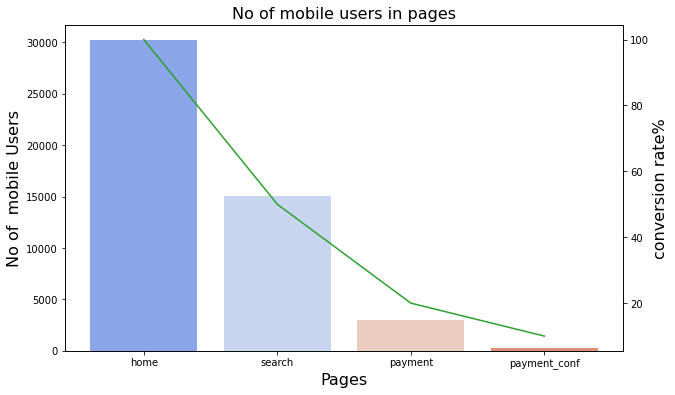

In [18]:
#create combo plot
fig,ax1 = plt.subplots(figsize = (10,6))
#bar plot creation
ax1.set_title('No of mobile users in pages', fontsize=16)
ax1.set_xlabel('Pages', fontsize=16)
ax1.set_ylabel('No of  mobile Users', fontsize=16)
ax1 = sns.barplot(pages, no_usersm, palette='coolwarm')
#for the same x axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('conversion rate%', fontsize=16)
ax2 = sns.lineplot(x = pages,y = convratm,sort = False, color=color)
plt.savefig("Comparison of mobile users and the conversion rate")
plt.show()








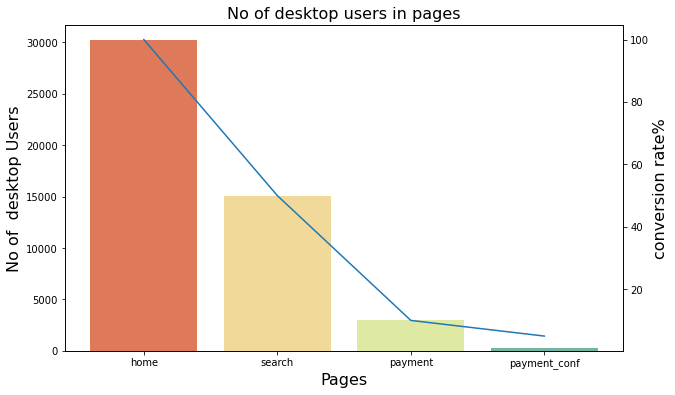

In [19]:
#create combo plot
fig,ax3 = plt.subplots(figsize = (10,6))
#bar plot creation
ax3.set_title('No of desktop users in pages', fontsize=16)
ax3.set_xlabel('Pages', fontsize=16)
ax3.set_ylabel('No of  desktop Users', fontsize=16)
ax3 = sns.barplot(pages, no_usersm, palette='Spectral')
#for the same x axis
ax4 = ax3.twinx()
color = 'tab:blue'
ax4.set_ylabel('conversion rate%', fontsize=16)
ax4 = sns.lineplot(x = pages,y = convratd,sort = False, color=color)
plt.savefig("Comparison of desktop users and the conversion rate")
plt.show()

In [31]:
#no of user in each page via mobile
stages = ["home", "search", "payment", "payment_conf"]
df_fem = pd.DataFrame(dict(number=[homefemale,searchfemale,paymentfemale,payconfemale], stage=stages))
df_fem['sex'] = 'female'
df_male = pd.DataFrame(dict(number=[homemale,searchmale,paymentmale,payconmale], stage=stages))
df_male['sex'] = 'Male'
df = pd.concat([df_fem, df_male], axis=0)
fig = px.funnel(df, x='number', y='stage', color='sex')
fig.show()

In [28]:
#no of user in each page via desktop
stages = ["home", "search", "payment", "payment_conf"]
df_fem = pd.DataFrame(dict(number=[homefemaled,searchfemaled,paymentfemaled,payconfemaled], stage=stages))
df_fem['sex'] = 'female'
df_male = pd.DataFrame(dict(number=[homemaled,searchmaled,paymentmaled,payconmaled], stage=stages))
df_male['sex'] = 'Male'
df = pd.concat([df_fem, df_male], axis=0)
fig = px.funnel(df, x='number', y='stage', color='sex')
fig.show()